In [115]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import os
import numpy as np
import seaborn as sns

def load_housing_data(housing_path = '../datasets/housing/'):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [53]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
from sklearn.model_selection import train_test_split
import seaborn as sns

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [55]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5]
                              )

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


<AxesSubplot:xlabel='income_cat', ylabel='count'>

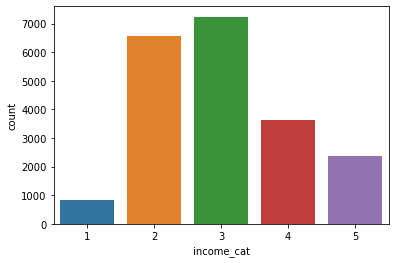

In [56]:
print(housing["income_cat"].value_counts() / len(housing["income_cat"]))

sns.countplot(x="income_cat", data=housing)

In [57]:
#随机的
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
train_set_income_count = train_set['income_cat'].value_counts().sort_index()
print('\nRandom split train dataset, distribution: (%)')
print(train_set_income_count/len(train_set)*100)

#分层的
train_set, test_set = train_test_split(housing, 
                     stratify=housing['income_cat'], test_size = 0.2, random_state=42)
train_set_income_count = train_set['income_cat'].value_counts().sort_index()
print('\nStartify split train dataset, distribution: (%)')
print(train_set_income_count/len(train_set)*100)

#整体的
print(housing["income_cat"].value_counts().sort_index() / len(housing["income_cat"]) * 100)


Random split train dataset, distribution: (%)
1     3.972868
2    31.746609
3    34.859496
4    17.853682
5    11.567345
Name: income_cat, dtype: float64

Startify split train dataset, distribution: (%)
1     3.984981
2    31.885901
3    35.059351
4    17.629603
5    11.440165
Name: income_cat, dtype: float64
1     3.982558
2    31.884690
3    35.058140
4    17.630814
5    11.443798
Name: income_cat, dtype: float64


In [58]:
corr_martix = housing.corr()
corr_martix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [59]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [60]:
strat_train_set, strat_test_set = train_test_split(housing, 
                     stratify=housing['income_cat'], test_size = 0.2, random_state=42)

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [61]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
imputer.statistics_

SimpleImputer(strategy='median')

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        3.00000000e+00,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [62]:
X = imputer.transform(housing_num)

In [63]:
housing[['ocean_proximity']].value_counts()

from sklearn.preprocessing import OneHotEncoder  
encoder = LabelEncoder()
housing_cat_1hot = housing['ocean_proximity']
housing_cat_encode = encoder.fit_transform(housing_cat)
housing_cat_encode

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

array([0, 0, 4, ..., 1, 0, 3])

In [66]:
from sklearn.preprocessing import OneHotEncoder  
encoder = OneHotEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encode = encoder.fit_transform(housing_cat_encode.reshape(-1, 1))
housing_cat_encode

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.preprocessing import LabelBinarizer  
encoder = LabelBinarizer( sparse_output = True)
housing_cat_1hot = encoder.fit_transform(housing['ocean_proximity'])
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [70]:
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

In [71]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [72]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,0.223852,2.0944,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,0.159057,2.70796,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,0.241291,2.02597,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,0.200866,4.13598,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,0.231341,3.04785,4.50581,3.04785


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [74]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [75]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [76]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [79]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [80]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [81]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [82]:
np.allclose(housing_prepared, old_housing_prepared)

True

In [83]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [85]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67784.32202861732

In [86]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49145.9385616408

In [87]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [88]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [90]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72221.45886857 69278.33465512 70153.43179866 69898.76324635
 70411.71082886 74407.50349947 71642.66557878 71215.48180177
 75815.23229863 70712.7886106 ]
Mean: 71575.73711868042
Standard deviation: 1968.6627265472991


In [91]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66140.5574445  66402.64250448 67308.08567538 73980.14151657
 67666.27878335 70758.72248018 63820.26082748 67347.49168296
 70423.45351656 67291.28882149]
Mean: 68113.8923252968
Standard deviation: 2722.3795780092823


In [92]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [93]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22151.647136973686

In [94]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51809.68996778 49007.48357407 53679.36228666 54415.36955287
 51251.92902108 56772.98770235 52229.40733515 49866.38194374
 55123.03978433 53337.72837667]
Mean: 52749.3379544699
Standard deviation: 2269.7893464033727


In [95]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68113.892325
std       2869.640041
min      63820.260827
25%      66624.804084
50%      67327.788679
75%      69734.159833
max      73980.141517
dtype: float64

In [96]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

SVR(kernel='linear')

106512.58423876738

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [98]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [99]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66131.94342346578 {'max_features': 2, 'n_estimators': 3}
57525.45269540361 {'max_features': 2, 'n_estimators': 10}
54410.69701644779 {'max_features': 2, 'n_estimators': 30}
61972.073682029826 {'max_features': 4, 'n_estimators': 3}
54714.205088475566 {'max_features': 4, 'n_estimators': 10}
52241.91233305598 {'max_features': 4, 'n_estimators': 30}
61611.183562211256 {'max_features': 6, 'n_estimators': 3}
54214.676560932225 {'max_features': 6, 'n_estimators': 10}
52000.9002680324 {'max_features': 6, 'n_estimators': 30}
60693.568463750446 {'max_features': 8, 'n_estimators': 3}
53918.932634022094 {'max_features': 8, 'n_estimators': 10}
51791.5151054305 {'max_features': 8, 'n_estimators': 30}
64074.64609576458 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55862.57521915211 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62045.800321348615 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54136.57637799724 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [100]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086790,0.016618,0.005231,0.000566,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.204972e+09,-4.513186e+09,...,-4.373434e+09,1.248234e+08,18,-1.100649e+09,-1.106709e+09,-1.124862e+09,-1.209006e+09,-1.183871e+09,-1.145019e+09,4.346581e+07
1,0.245885,0.006278,0.013767,0.000791,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.074279e+09,-3.432251e+09,...,-3.309178e+09,1.560742e+08,11,-6.029601e+08,-5.973483e+08,-6.035260e+08,-6.408215e+08,-6.152356e+08,-6.119783e+08,1.555216e+07
2,0.714521,0.019289,0.035286,0.001298,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.813972e+09,-3.057111e+09,...,-2.960524e+09,1.555263e+08,8,-4.574785e+08,-4.499744e+08,-4.494850e+08,-4.730124e+08,-4.580355e+08,-4.575972e+08,8.505874e+06
3,0.111644,0.001952,0.004466,0.000130,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.709663e+09,-3.865387e+09,...,-3.840538e+09,1.114349e+08,15,-1.005055e+09,-9.663760e+08,-9.631303e+08,-1.044090e+09,-9.780508e+08,-9.913405e+08,3.022002e+07
4,0.374543,0.011562,0.013531,0.001964,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.839814e+09,-3.049596e+09,...,-2.993644e+09,1.241230e+08,9,-5.460150e+08,-5.442985e+08,-5.189567e+08,-5.757153e+08,-5.323615e+08,-5.434694e+08,1.882139e+07
5,1.127462,0.016531,0.034716,0.000582,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.545732e+09,-2.796218e+09,...,-2.729217e+09,1.590666e+08,3,-4.191215e+08,-4.141198e+08,-4.088791e+08,-4.300870e+08,-4.183736e+08,-4.181162e+08,7.009610e+06
6,0.157901,0.003231,0.004565,0.000273,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.774024e+09,-3.726905e+09,...,-3.795938e+09,1.343186e+08,14,-1.039202e+09,-9.695440e+08,-9.994769e+08,-1.033791e+09,-1.035120e+09,-1.015427e+09,2.701833e+07
7,0.524452,0.033142,0.013181,0.000509,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.745851e+09,-3.004894e+09,...,-2.939231e+09,1.608939e+08,7,-5.558216e+08,-5.276334e+08,-5.294080e+08,-5.611983e+08,-5.553615e+08,-5.458846e+08,1.433632e+07
8,1.825858,0.241864,0.036363,0.003950,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.522829e+09,-2.775686e+09,...,-2.704094e+09,1.719236e+08,2,-4.228068e+08,-4.068334e+08,-4.220146e+08,-4.252585e+08,-4.208323e+08,-4.195491e+08,6.521109e+06
9,0.199672,0.009034,0.004520,0.000306,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.345059e+09,-3.945320e+09,...,-3.683709e+09,2.601360e+08,13,-9.474535e+08,-9.462738e+08,-1.008057e+09,-9.915406e+08,-9.525722e+08,-9.691795e+08,2.562803e+07


In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x122820970>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x122769910>},
                   random_state=42, scoring='neg_mean_squared_error')

In [102]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50811.44315668507 {'max_features': 7, 'n_estimators': 180}
53406.72383278459 {'max_features': 5, 'n_estimators': 15}
52525.51612964028 {'max_features': 3, 'n_estimators': 72}
52900.80788594139 {'max_features': 5, 'n_estimators': 21}
50958.00221390478 {'max_features': 7, 'n_estimators': 122}
52501.08788056325 {'max_features': 3, 'n_estimators': 75}
52457.37386476382 {'max_features': 3, 'n_estimators': 88}
51568.18510507735 {'max_features': 5, 'n_estimators': 100}
52297.18831534609 {'max_features': 3, 'n_estimators': 150}
66368.74609306744 {'max_features': 5, 'n_estimators': 2}


In [103]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.16987253e-02, 4.84388478e-02, 4.35994406e-02, 1.41732167e-02,
       1.43616617e-02, 1.33356372e-02, 1.40853354e-02, 3.01078540e-01,
       1.20253444e-01, 3.41974551e-02, 1.89312696e-02, 6.75241298e-02,
       2.65415932e-02, 6.30434503e-02, 2.59018419e-02, 6.53048498e-03,
       1.31245315e-01, 4.17938670e-05, 1.82023735e-03, 3.19758102e-03])

In [104]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30107854003463086, 'median_income'),
 (0.1312453145324801, 'INLAND'),
 (0.12025344367224292, 'income_cat'),
 (0.06752412976671635, 'population_per_household'),
 (0.06304345028233407, 'pop_per_hhold'),
 (0.051698725313192494, 'longitude'),
 (0.04843884778043397, 'latitude'),
 (0.043599440569277226, 'housing_median_age'),
 (0.03419745512929854, 'rooms_per_household'),
 (0.026541593190540357, 'rooms_per_hhold'),
 (0.025901841923332263, 'bedrooms_per_room'),
 (0.01893126963550547, 'bedrooms_per_room'),
 (0.014361661686620036, 'total_bedrooms'),
 (0.014173216652233442, 'total_rooms'),
 (0.014085335397587334, 'households'),
 (0.013335637223048653, 'population'),
 (0.006530484975669719, '<1H OCEAN'),
 (0.003197581017335561, 'NEAR OCEAN'),
 (0.0018202373505029786, 'NEAR BAY'),
 (4.1793867017681965e-05, 'ISLAND')]

In [106]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

49893.9906242225

In [107]:
from scipy import stats

In [108]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([47885.17986684, 51824.99541669])

In [109]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   FunctionTransformer(func=<function add_extra_features at 0x121ffd4c0>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'po

array([200860.48973484, 325527.93559759, 201882.47991703,  54956.04539331,
       188116.26928254])

In [110]:
my_model = full_pipeline_with_predictor

In [114]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
my_model_loaded = joblib.load("my_model.pkl") # DIFF

['my_model.pkl']